In [40]:
# Setup for Keras

# Common imports
import numpy as np
import os
import pandas as pd
import sklearn

import tensorflow as tf
import keras #requirement: keras 3
os.environ["KERAS_BACKEND"] = "tensorflow"
#os.environ["KERAS_BACKEND"] = "pytorch"

# to make this notebook's output stable across runs
np.random.seed(42)
keras.utils.set_random_seed(42)

print(tf.__version__) #requirement: >= 15

# Where to save the models
PROJECT_ROOT_DIR = "."
MODEL_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
os.makedirs(MODEL_PATH, exist_ok=True)


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Utility functions to plot grayscale and RGB
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

2.19.0


In [41]:
# Load Fashion MNIST data

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# Auto-Encoders

Unsupervised method for: 
- anomaly detection, 
- feature extraction, 
- dimensionality reduction... 
- in general: "learning the structure" of data.

**Aim**: Learn a meaningful (usually lower-dimensional) representation $\mathbf{z}\in \mathbb{R^d}$ of data $\mathbf{x}\in \mathbb{R}^n$ with a NN. 


An **Autoencoder** is a NN with the following architecture: 
- Encoder = NN with n-dim'l input, "meaningful" d-dim'l output
- Decoder = NN with d-dim'l input, n-dim'l output
- Train the Encoder-Decoder Network to reconstruct the input: 
  Loss function (for $e$= encoder function, $d$=decoder function): MSE between input and output $$\frac{1}{m}\sum_{i=1}^m ||\mathbf{x}^{(i)}- d(e(\mathbf{x}^{(i)}))||^2$$

<img src="../../assets/Image_AE.png" alt="Image_AE.png" style="width:600px" title="Hands-on-ML"/>


<img src="../../assets/Image_AE.png" alt="Image_AE.png" style="width:400px" title="Hands-on-ML"/>

Usually: encoding dimension < input dimension = **"Undercomplete Autoencoder"** (i.e. the Encoder-Decoder Architecture is like an hourglass). (The alternative would be called **overcomplete**)

**Probabilistic model:**
- Encoder: $p(\mathbf{z}|\mathbf{x})$
- Decoder: $p(\mathbf{x}|\mathbf{z})$

### Variants 

**Question:** If you want to reduce the number of trainable weights, you could use the same weights in the encoder as in the decoder. How?

**Tied Autoencoder:** decoder-weights = ?


**Regularized Autoencoder:** instead of having $d<n$, use regularization to constrain the Autoencoder
- e.g. sparsity-inducing regularizer: Autoencoder with l1-regularized loss

**Comparison to PCA:** 
- pro: more meaningful represenation, less info lost
- pro: non-linear, i.e. Autoencoder can learn manifold structures
- con: harder and slower to train

### Example of an Autoencoder

for fashion MNIST loaded above:

Suppose we have the following encoder: 

In [42]:
# Autoencoder with 3 hidden layers and 1 output layer to encode the fashion images in 2D

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])


**Question:** What would the decoder look like?

In [43]:
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

The Autoencoder is then the decoder stacked on top of the encoder:

In [44]:

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[keras.metrics.Accuracy()])
history = stacked_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 5.4219e-08 - loss: 0.3807 - val_accuracy: 0.0000e+00 - val_loss: 0.3182
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 8.3785e-09 - loss: 0.3083 - val_accuracy: 0.0000e+00 - val_loss: 0.3033
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 9.2431e-08 - loss: 0.2999 - val_accuracy: 2.5510e-07 - val_loss: 0.2986
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 7.0403e-08 - loss: 0.2951 - val_accuracy: 0.0000e+00 - val_loss: 0.2965
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 2.0300e-08 - loss: 0.2919 - val_accuracy: 0.0000e+00 - val_loss: 0.2947
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 8.1296e-09 - loss: 0.2897 - val_accuracy: 0.0000e+00 - val_loss: 0.2923
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 2.9885e-08 - loss: 0.2882 - val_accuracy: 0.0000e+00 - val_loss: 0.2902
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━

Let's see how well this autoencoder reconstructs images after only 10 epochs of training:

In [45]:
# This function processes a few test images through the autoencoder and displays the original images and their reconstructions:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


It's ok, but not great. **Question:** What could you do to improve the autoencoder apart from training for more epochs?

In [46]:
# Using Convolutional Layers instead of dense Layers for encoder, and Deconvolution for decoder

keras.utils.set_random_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[keras.metrics.Accuracy()])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5


/Users/korbinianziegltrum/miniconda3/envs/ml2/lib/python3.11/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/korbinianziegltrum/miniconda3/envs/ml2/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 7.1466e-08 - loss: 0.3370 - val_accuracy: 0.0000e+00 - val_loss: 0.2826
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 1.2148e-07 - loss: 0.2769 - val_accuracy: 2.5510e-07 - val_loss: 0.2736
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 1.1559e-07 - loss: 0.2712 - val_accuracy: 0.0000e+00 - val_loss: 0.2700
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 1.9858e-07 - loss: 0.2683 - val_accuracy: 0.0000e+00 - val_loss: 0.2682
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 2.1206e-08 - loss: 0.2665 - val_accuracy: 0.0000e+00 - val_loss: 0.2667


### Visualisation with Autoencoders

If the encoding space is e.g. 2-dimensional, you can use an autoencoder to visualize data in 2D and find clusters this way. 

<img src="../../assets/Image_MNIST_fashion_visualization.png" alt="Image_MNIST_fashion_visualization.png" style="width:400px" title="Hands-on-ML"/>


### Denoising Autoencoders

**Aim:** denoise e.g. sensor data

**How:** Add noise (e.g. Gaussian) to the training data input and try to reconstruct the original non-noisy output 

**probabilistic model:** $p(x|o(x+\epsilon))$, where $\epsilon$ is noise, e.g. $\sim N(0,1)$, and $o$ is the prediction function given by the NN. 

<img src="../../assets/Image_Denoising_AE.jpg" alt="Image_Denoising_AE.jpg" style="width:400px" title="UvA"/>

- a denoising autoencoder can be overcomplete ($d\geq n$)
- more noise $\Rightarrow$ more robust model

Example: 

In [47]:
# Denoising Autoencoders 

keras.utils.set_random_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2), # Add random Gaussian noise to the input!
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[keras.metrics.Accuracy()])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid)) # Reconstruct the original data from the noisy data


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 6.9537e-09 - loss: 0.3962 - val_accuracy: 0.0000e+00 - val_loss: 0.3167
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 1.2503e-07 - loss: 0.3138 - val_accuracy: 0.0000e+00 - val_loss: 0.3075
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 7.9818e-08 - loss: 0.3060 - val_accuracy: 0.0000e+00 - val_loss: 0.3036
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.4653e-07 - loss: 0.3016 - val_accuracy: 0.0000e+00 - val_loss: 0.2993
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 4.0770e-08 - loss: 0.2984 - val_accuracy: 0.0000e+00 - val_loss: 0.2962
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.3075e-07 - loss: 0.2960 - val_accuracy: 0.0000e+00 - val_loss: 0.2939
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 2.0240e-07 - loss: 0.2941 - val_accuracy: 2.5510e-07 - val_loss: 0.2925
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


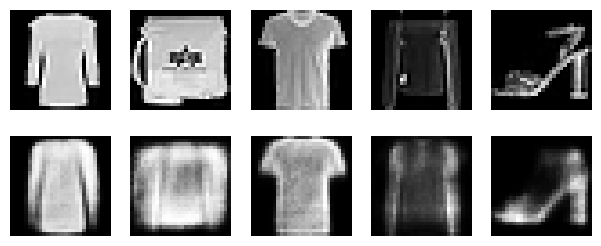

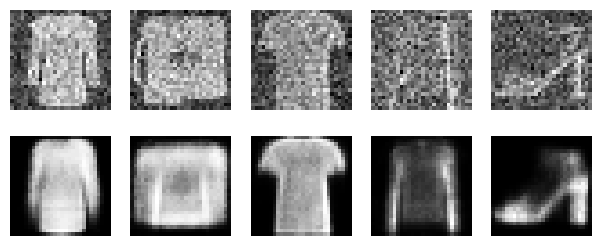

In [48]:
keras.utils.set_random_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

### Autoencoders for unsupervised feature learning

unlabeled data, want to learn the inherent "structure" of the data $\Rightarrow$ Use encoder as feature extractor $=$ form of transfer learning

- train Autoencoder on unlabeled data
- add e.g. classification layer to the encoder
- fine tune with a few labeled examples using supervised learning

**Application:** Semantic hashing: given a database of images and a image query, return the most similar images in the DB

# Generative Models


## 1. Introduction

<img src="../../assets/Image_Unsupervised_Gen_prob_gen_overview.png" alt="Image_Unsupervised_Gen_prob_gen_overview.png" style="width:250px" title="UDL"/>

- Generative models can create new examples/training instances
- Probabilistic generative models (PGM) do this by learning distribution over data


### Generative Tasks  

**Synthesis** = generate samples that mimick the input, e.g. 

<img src="../../assets/Image_Synthesis_Task.png" alt="IImage_Synthesis_Task.png" width="500" title="UDL"/><br></br>

<img src="../../assets/Image_Synthesis_Task_Images.png" alt="Image_Synthesis_Task_Images.png" style="width:500px" title="UDL"/>

**Conditional Synthesis** = generate samples that satisfy some conditions (like coinciding with the good parts of given corrupted data)
<br></br><img src="../../assets/Image_Conditional_Synthesis.png" alt="Image_Conditional_Synthesis.png" style="width:500px" title="UDL"/>

**Generative Interpolation**
<br></br><img src="../../assets/Image_Generative_Interpolation.png" alt="Image_Generative_Interpolation.png" style="width:500px" title="UDL"/>

## 1. Variational Autoencoder (VAE) (Kingma & Welling '13)

When training an autoencoder to encode data, we also get a decoder, which turns the encoding back into the original image. 

**Question:** What happens if we use just any vector $\mathbf{z}$ from the encoding space and use the decoder? Can we generate new samples this way?  

 **Terminology:** In the setting of generative NNs, the vectors $\mathbf{z}$ are called **latent variables**, and the encoding space **latent space**. 

<img src="../../assets/VAE(EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons).jpg" alt="VAE(EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons).jpg" style="width:500px" title="EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons"/>

**Aim:** Force the model to "shape" the latent space in a way that latent vectors $z$ sampled from a standard normal distribution $z\sim N(0,1)$ are mapped to "true" samples. 


<img src="../../assets/VAE(EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons).jpg" alt="VAE(EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons).jpg" style="width:500px" title="EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons"/>

**Question:** Thinking in terms of Bayesian statistics, how are the **encoder $p(z|x)$**, the **prior of the "good" latent vectors $p(z)$**, the **decoder $p(x|z)$**, and the total distribution of samples $p(x)$ connected?



**Idea:** We want to generate a "true" sample from $p(x)$. Calculating the integral is usually mathematically impossible. What to do?
- Let the endoder output a distribution $N(z|\mu(x), \sigma(x))$, 
- put samples from this distribution as input into the decoder,  
- train both to fit together as in the Bayes formula above. 
- Then, any input from $p(z)\sim N(0,1)$ gives a good approx. sample of $p(x)$. 

<img src="../../assets/VAE(EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons).jpg" alt="VAE(EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons).jpg" style="width:500px" title="EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons"/>

Note: The encoder Gaussian distribution is higher-dimensional (mulitvariate), i.e. $\mu(\mathbf{x})$ is a vecotr and $\sigma(\mathbf{x})$ should actually be a matrix, but we assume it is a diagonal matrix with entries $\sigma_i(\mathbf{x})$, which we can write as a single vector $\sigma(\mathbf{x})=(\sigma_i(\mathbf{x}))$. 

**Question:** What are the sizes of $\mu(\mathbf{x})$ and $\sigma(\mathbf{x})$?

 
**Question:** How can we get the model to "tell us" $\mu(\mathbf{x}), \sigma(\mathbf{x})$ so we can sample the input to the decoder from the correct distribution?

### Summary: Architecture of a Variational Autoencoder (Training: see later)

<img src="../../assets/VAE_2_(EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons).jpg" alt="VAE_2_(EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons).jpg" style="width:500px" title="EugenioTL, CC BY-SA 4.0 https- creativecommons.org licenses by-sa 4.0 , via Wikimedia Commons"/>

A Variational Autoencoder (VAE) has a similar architecture as an Autoencoder, only:
- endoder-output: [mean, variance, sample_vector] of size [latent_dim, latent_dim, latent_dim], where sample_vector is a sample from the Gaussian Normal distribution with mean=mean and covariance = diagonal variance.
- decoder-input: sample_vector

### Training a VAE

The training objective is made to force the model to "respect" the Bayes formula (follows from statistics, see later). The loss function is:
$$L_{VAE}=-\frac{1}{2}\sum_{i=1}m\left(1+\log\left(\sigma_i^2\right)-\sigma_i^2-\mu_i^2\right)$$
where $\sigma_i^2$ and $\mu_i$ are the ith components of the output vectors for standard deviation and mean of the encoder.

A common output tweak is to output $\gamma_i=\log(\sigma_i^2)$ instead of $\sigma_i^2$ and take the following loss: 
$$L_{VAE, log}=-\frac{1}{2}\sum_{i=1}m\left(1+\gamma_i-\exp(\gamma_i)-\mu_i^2\right)$$


### Constructing new samples


Sample $z$ from the standard normal distribution (= prior distribution!) and apply the decoder. 

### Advantages/Disadvantages

Disadvantage of Autoencoders over VAE: the output images become blurry (due to MSE-Error), can't be used to generate samples
Advantage of Autoencoders over VAE: ned far less parameters, simpler/faster training

### VAE with Keras

How to build a VAE in practice: 
- build an encoder (like for the autoencoder), but with three outputs: one output that learns each output unit's mean, and one output that learns each output unit's (logarithmic) variance, and then combine those two for a third output (below called `codings`), which is a random sample from the normal distribution.
- build an Autoencoder-like decoder that takes the encoder's codings-output as input and has output the same size as the input
- Then define a VAE-Model that combines both
- train with the VAE loss.

In [49]:
# Variational Autoencoder


class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return keras.random.normal(keras.ops.shape(log_var)) * K.exp(log_var / 2) + mean 


keras.utils.set_random_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[keras.metrics.Accuracy()])
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))


AttributeError: Exception encountered when calling Sampling.call().

[1mCould not automatically infer the output shape / dtype of 'sampling_15' (of type Sampling). Either the `Sampling.call()` method is incorrect, or you need to implement the `Sampling.compute_output_spec() / compute_output_shape()` method. Error encountered:

module 'keras.backend' has no attribute 'exp'[0m

Arguments received by Sampling.call():
  • args=(['<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_256>', '<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_257>'],)
  • kwargs=<class 'inspect._empty'>

1/1 [==============================] - 0s 12ms/step


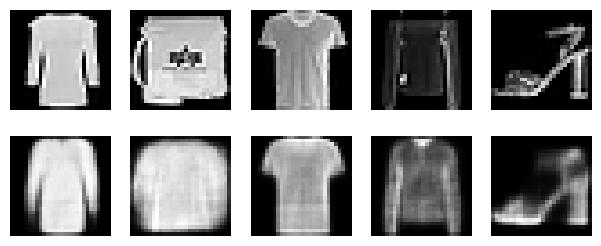

In [ ]:
show_reconstructions(variational_ae)
plt.show()

In [ ]:
# Generate fashion images from the VAE

def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

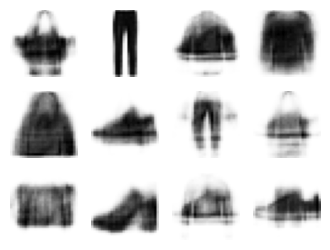

In [ ]:
# Let's generate a few random codings, decode them and plot the resulting images:

keras.utils.set_random_seed(42)

codings = keras.random.normal(shape=[12, codings_size])
images = keras.ops.convert_to_numpy(variational_decoder(codings))
plot_multiple_images(images, 4)

## Training an Autoencoder - the statistical model

### The setting

Recall: 
- **probabilistic encoder**: $p(z|x)$
- **latent vector prior**: $p(z)$**,
- **probabilistic decoder**: $p(x|z)$
- **total distribution of samples**: $p(x)$ 
These are connected with Bayes' formula for density functions:

$p(z|x)=\frac{p(x|z)\cdot p(z)}{p(x)}$; $p(x)=\int_z p(x|z)p(z) dz$. 

**Problems:** 
- This integral cannot be solved. 
- $\Rightarrow$ The posterior distribution (i.e. the encoder) $p(\mathbf{z}|\mathbf{x})$ cannot be computed, but only approximated.

Aim: introduce an auxiliary (easy) distribution $q(\mathbf{z}|\mathbf{x})$ that **approximates** the true posterior $p(\mathbf{z}|\mathbf{x})$ as well as possible. 
This method is called **variational inference**.

What do we mean with "approximate"? I.e. what is a measure of similarity for probability distributions?

### Kullback-Leibler Divergence

This is a measure of how "similar" two probability distributions are! If $p(x)$ and $q(x)$ are two discrete distributions,  their **Kullback-Leibler Divergence** (= **Information Gain = KL-divergence**) is defined as: 

$$\text{KL}(p||q):= \sum_{x\in W(x)}p(x)\cdot \log\frac{p(x)}{q(x)}$$

And if $p(x)$ and $q(x)$ are two continuous distributions (e.g. normal distributions), their KL-divergence is defined as: 

$$\text{KL}(p(x)||q(x)):= \int_{-\infty}^{\infty} p(x)\cdot \log\frac{p(x)}{q(x)}\text{d}x$$

The following properties hold:
 $$KL(p||q)\geq 0 \text{ and }$$ 
 
$$KL(p||q)=0 \Leftrightarrow p=q $$
But: it is not symmetric! 


 ### Training a VAE

Aim: train an encoder $q((\mathbf{z}|\mathbf{x}))$ that is close to $p((\mathbf{z}|\mathbf{x}))$, i.e. that has minimal $KL(q((\mathbf{z}|\mathbf{x}))||p((\mathbf{z}|\mathbf{x})))$, and the decoder that generates good samples.

How? One can show (see appendix for details): 
$$\log p_{\theta}(\mathbf{x})= \text{ELBO}_{\theta,\phi}(\mathbf{x})+ \text{KL}(q_{\phi}(\mathbf{z}|\mathbf{x})||p_{\theta}(\mathbf{z}| p_{\theta}(\mathbf{z}| \mathbf{x}))),$$

where 
- **ELBO = "evidence lower bound"** = $\int_{-\infty}^{\infty} q_{\phi}(\mathbf{z}|\mathbf{x})\cdot \log \left( \frac{p_{\theta}(\mathbf{x},\mathbf{z})}{ q_{\phi}(\mathbf{z}|\mathbf{x})}\right)$
- $p_{\theta}(\mathbf{x})$ is the likelihood of getting the data. 


$\Rightarrow$ **Two simultaneous objectives for VAE:** 
- maximize likelihood of getting the observed data $p_{\theta}(\mathbf{x})$ 
- miminize KL-divergence (difference between the "appoximate" encoder distribution and the true one)
Which can both be achieved at the same time **if ELBO is maximized**!

$\Rightarrow$ **Training of a VAE:**
Train the AE-architecture with a different objective, the ELBO-objective. 

If you calculate with Gaussian normal distributions using a **reparametrization trick** (not done here) the training objective becomes: 
$$L=-\frac{1}{2}\sum_{i=1}m\left(1+\log\left(\sigma_i^2\right)-\sigma_i^2-\mu_i^2\right)$$
where $\sigma_i^2$ and $\mu_i$ are the ith components of the output vectors for standard deviation and mean of the encoder.

**Importance of VAEs:**

For several years, variational autoencoders were quite popular, but a different method eventually took the lead, in particular because they are capable of generating much more realistic and crisp images GANs (Generative Adversarial Networks). However, recently, VAEs have been used as part of archtiectures like Stable Diffusion, see later.

## 2. Generative Adversarial Network (GAN) (Goodfellow et al, '14)

Can we learn the generator alone (no decoder-encoder)? How? Network needs to know what a "correct" sample is to generate... 

**Question:** How can you make a network learn what a correct sample is with a network architecture like the following?

<img src="../../assets/Image_GAN_Overview.png" alt="Image_GAN_Overview.png" style="width:400px" title="UvA"/>


Two NNs: 
- a **generator network** $G(\mathbf{z})$ takes a random code $\mathbf{z}$ as input and outputs a (fake) sample $\mathbf{x}$ (e.g. a image). 
- a **discriminator network** $D(\mathbf{x})\in [0,1]$, which takes a sample (real or fake) and estimates the probability to be real

<img src="../../assets/Image_GAN_Overview.png" alt="Image_GAN_Overview.png" style="width:400px" title="UvA"/>

**The objective:** minimize for G, maximize for D: argmin $_G$ argmax $_D$
$$V(G,D)= \mathbb{E}_{\mathbf{x}\sim p_{data}(\textbf{x})}[\log D(\mathbf{x})]+\mathbb{E}_{\mathbf{z}\sim p(\textbf{z})}\left[\log(1- D(G(\mathbf{x})))\right]$$
- for fixed $G$, the loss is binary cross-entropy




**Setting up the model:**

- Define two networks, generator and discriminator
- Define the GAN network as the combination of both
- Compile the discriminator individually with cross-entropy loss
- Compile GAN with cross-entropy loss

**Training in practice:**

For each epoch and each batch, train discriminator and generator one after the other: 
- Training the discriminator: 
    - use the (present state of the) generator to generate fake samples from noise
    - concatenate real samples with label=1 and fake samples with label=0 as training set of the discriminator
    - train the discriminator on the above data
- Training the generator: 
    - Use the GAN network, but fix the discriminator weights (trainable=False)
    - create a training dataset from: input = random noise, label = 1 (want the generated images to be classified as real)
    - Train the GAN (with fixed discriminator weights, i.e. only the generative part) on this dataset.

**Practical issues:** Mathematically speaking, with the above training we don't want to find a minimum, but a saddle point (harder to find) $\Rightarrow$ can be difficult to find the stable solution

<img src="../../assets/Image_Saddle_Point.png" alt="Image_Saddle_Point.png" style="width:400px" title="UvA"/>

### Example: Deep Convolutional GAN = DCGAN (Radford et al '15)

(like an inverse U-Net)

- convolutional layers for the discrimiatior
- deconvolutional layers for the generator 

Generator Architecture:
<br></br><img src="../../assets/Image_DCGAN.png" alt="Image_DCGAN.png" style="width:500px" title="UvA"/><br></br>



Output for random bedroom generation: 

<img src="../../assets/Image_DCGAN_Bedroom.png" alt="Image_DCGAN_Bedroom.png" style="width:500px" title="UvA"/><br></br>

Can be used for interpolation: bedroom space interpolation 
<img src="../../assets/Image_DCGAN_Bedroom_interpolation.png" alt="Image_DCGAN_Bedroom_interpolation.png" style="width:500px" title="UvA"/>


### Other Application of GAN: image-to-image translation (conditional generation) (Isola et al, '16)
<img src="../../assets/Image_GAN_Conditional_Generation.png" alt="Image_GAN_Conditional_Generation.png" style="width:500px" title="UvA"/>

### GAN with Keras


In [ ]:
np.random.seed(42)
keras.utils.set_random_seed(42)

codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

/Users/korbinianziegltrum/miniconda3/envs/ml2/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/korbinianziegltrum/miniconda3/envs/ml2/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))              
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = keras.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = keras.ops.concatenate([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = keras.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                    
        plt.show()    

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=10)

Epoch 1/10


2025-07-17 20:50:00.906130: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


NameError: name 'plot_multiple_images' is not defined

## 3. Stable Diffusion (Rombach et al, '22): The power of VAE, Diffusion, U-Net and Attention combined! 

Diffusion models (Sohl-Dickstin, Weiss et al, https://arxiv.org/pdf/1503.03585.pdf): Introduced in 15, trained with the objective of removing successive applications of Gaussian noise on training images which can be thought of as a sequence of denoising autoencoders. 

<img src="../../assets/Image_Diffusion_Process_Swiss_Roll.png" alt="Image_Diffusion_Process_Swiss_Roll.png" style="width:500px" title="https://arxiv.org/pdf/1503.03585.pdf"/>

Latent diffusion models: Same as above, only with denoising VAEs. 




Stable Diffusion: 
VAE with additional layers (Diffusion and U-Net+Attention) in between encoder and decoder: 
- A VAE encoder compresses the image from pixel space to a lower-dimensional latent space capturing semantic meaning of the image. 
- Gaussian noise is iteratively applied to the compressed latent representation during forward diffusion
- U-Net with residual connections denoises the output backward to obtain a latent representation; this is where the conditioning comes in via a parametric cross-attention module 
attention (Q, K,V) (query = activation of the U-Net layer, key = value = input like language prompt or image)
- VAE decoder generates the final image 



Training: 
- on pairs of images+captions taken from LAION-5B with 5 billion image-text pairs

<img src="../../assets/Image_Stable_Diffusion_architecture.png" alt="Image_Stable_Diffusion_architecture.png" style="width:500px" title="https://arxiv.org/abs/2112.10752"/><

- loss function: more or less the MSE between the input image and output images


### Appendix

$$\log p_{\theta}(\mathbf{x})=\int q_{\phi}(\mathbf{z}|\mathbf{x}) \log p_{\theta}(\mathbf{x}) dz 
=\int q_{\phi}(\mathbf{z}|\mathbf{x}) \log \frac{p_{\theta}(\mathbf{x},\mathbf{z})}{ p_{\theta}(\mathbf{z}| \mathbf{x})} dz $$
$$
=\int q_{\phi}(\mathbf{z}|\mathbf{x}) \log  \frac{p_{\theta}(\mathbf{x},\mathbf{z})q_{\phi}(\mathbf{z}|\mathbf{x})}{ q_{\phi}(\mathbf{z}|\mathbf{x})\cdot p_{\theta}(\mathbf{z}| \mathbf{x})} dz$$
$$=\left(\int q_{\phi}(\mathbf{z}|\mathbf{x}) \log  \frac{p_{\theta}(\mathbf{x},\mathbf{z})}{ q_{\phi}(\mathbf{z}|\mathbf{x})} dz\right) 
+ \left(\int q_{\phi}(\mathbf{z}|\mathbf{x}) \log  \frac{q_{\phi}(\mathbf{z}|\mathbf{x})}{ p_{\theta}(\mathbf{z}| \mathbf{x})} dz \right)
$$
$$=\mathbb{E}_{z\sim q_{\phi}(\mathbf{z}|\mathbf{x})}\left[\log  \frac{p_{\theta}(\mathbf{x},\mathbf{z})}{ q_{\phi}(\mathbf{z}|\mathbf{x})}\right] 
+ \mathbb{E}_{z\sim q_{\phi}(\mathbf{z}|\mathbf{x})}\left[\int q_{\phi}(\mathbf{z}|\mathbf{x}) \log  \frac{q_{\phi}(\mathbf{z}|\mathbf{x})}{ p_{\theta}(\mathbf{z}| \mathbf{x})} \right]
$$

$$
=:\text{ELBO}_{\theta,\phi}(\mathbf{x})+ \text{KL}(q_{\phi}(\mathbf{z}|\mathbf{x})||p_{\theta}(\mathbf{z}| p_{\theta}(\mathbf{z}| \mathbf{x})))$$